# Neural Network

## 1. Perceptrons

<img src="fig/lclf.png" width=500 height=500 />

<img src="fig/lclf1.png" width=500 height=500 />

## 2. Non-linear classifiers

<img src="fig/nclf.png" width=500 height=500 />

## 3. Multi-layer perceptron model

<img src="fig/nclf1.png" width=500 height=500 />

## 3.1 Universal approximation theorem

<img src="fig/uat.png" width=400 height=400 />

**The universal approximation theorem proves that for any continuous function, <br> there exists a shallow network that can approximate this function to any specified precision.**

<img src="fig/region.png" width=500 height=500 />

### 3.2 Common activation functions in neural networks include:

- **The sigmoid function**, which maps any input to a value between 0 and 1.
- **The hyperbolic tangent (or tanh) function**, which maps inputs to a value between -1 and 1.
- **The rectified linear unit (or ReLU)**, which maps any negative input to 0 and leaves any positive input unchanged.
- **The softmax function**, which converts a vector of inputs to a vector whose elements range from 0 and 1 and collectively sum to 1.

<img src="fig/activ.fun.png" width=500 height=500 />

## 4. Neural Network Algorithm:

### The forward pass

<img src="fig/fwd.png" width=500 height=500 />

### Learning as loss minimization

<img src="fig/minim_loss.png" width=500 height=500 />

### The backward pass

<img src="fig/bwd0.png" width=500 height=500 />

### Output layer derivatives

<img src="fig/bwd1.png" width=500 height=500 />

<img src="fig/bwd2.png" width=500 height=500 />

### Hidden layer derivatives

<img src="fig/bwd3.png" width=500 height=500 />

<img src="fig/s.png" width=300 height=300 />

<img src="fig/bwd4.png" width=500 height=500 />

## Training neural networks with SGD

- SGD update: $w = w − 𝜂 ∇ 𝑓_{𝑖} (x)$

- May oscillate or reach a local minima
  
- Termination criteria: Number of epochs, Threshold on training set error, No
decrease in error, Increased error on a validation set


- Dynamic Learning Rate. Basic technqiues desrcibed below:
  
$\quad \quad$ piecewise constant: $𝜂(𝑡) = 𝜂_{𝑖} \quad \text{if} \quad 𝑡_{𝑖} ≤ 𝑡 ≤ 𝑡_{𝑖+1}$ <br>
$\quad \quad$ exponential decay: $𝜂(𝑡) = 𝜂_{0} · 𝑒^{−𝜆𝑡}$ <br>
$\quad \quad$ polynomial decay: $𝜂(𝑡) = 𝜂_{0} · (𝛽𝑡 + 1)^{−𝛼}$ <br>

### Preventing overfitting

- Running too many epochs may over-train the network and result in
over-fitting

- Keep a hold-out validation set and test accuracy after every epoch

- Avoiding overfitting with Dropout during __training__

#### Adavance methods to solve the gradient descent problem (Variance reduction techniques)

    - Momentum, Adagrad, Adadelta, ADAM, and other variants.
    - These Methods have a fast exponential convergence like full gradient descent.

# Implementation of Neural Network Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [2]:
# Make some training data
n = 20
X = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
T = 0.2 + 0.05 * (X + 10) + 0.4 * np.sin(X + 10) + 0.2 * np.random.normal(size=(n, 1))

# Make some testing data
Xtest = X + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (X + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

In [3]:
print(X.shape)

(20, 1)


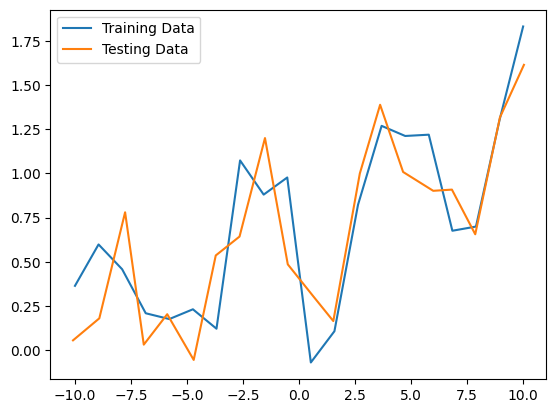

In [4]:
plt.plot(X, T, label='Training Data')
plt.plot(Xtest, Ttest, label='Testing Data')
plt.legend();

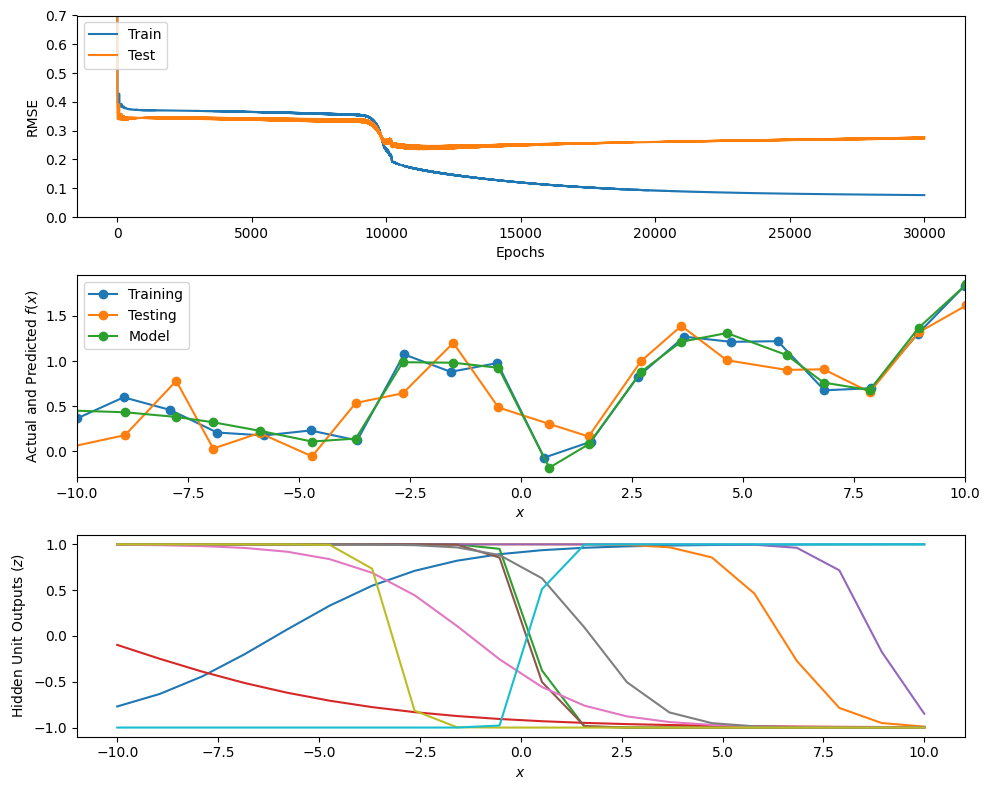

In [5]:
# Set parameters of neural network
nHiddens = 10

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples * nOutputs)
ro = rhoo / (nSamples * nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1 * 2 * (np.random.uniform(size=(1 + 1, nHiddens)) - 0.5)
W = 0.1 * 2 * (np.random.uniform(size=(1 + nHiddens, nOutputs)) - 0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nSteps steepest descent steps in gradient descent search in mean-squared-error function
nSteps = 30000

# collect training and testing errors for plotting
errorTrace = np.zeros((nSteps, 2))

fig = plt.figure(figsize=(10 ,8))

for step in range(nSteps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:, :].T) * (1 - Z**2))
    W = W + ro * Z1.T @ error

    # error traces for plotting
    errorTrace[step, 0] = np.sqrt(np.mean((error**2)))
    
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[step, 1] = np.sqrt(np.mean((Ytest - Ttest)**2))

    if step % 1000 == 0 or step == nSteps-1:
        plt.clf()
        
        # Plot the trace of the mean squared error on training and testing data
        plt.subplot(3, 1, 1)
        plt.plot(errorTrace[:step, :])
        plt.ylim(0, 0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'), loc='upper left')
        
        # Plot the training and testing data, and 
        # the output of our neural network model on the test data
        plt.subplot(3, 1, 2)
        plt.plot(X, T, 'o-', Xtest, Ttest, 'o-', Xtest, Ytest, 'o-')
        plt.xlim(-10, 10)
        plt.legend(('Training','Testing','Model'), loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        # Plot the output of the hidden layer for each training sample
        plt.subplot(3, 1, 3)
        plt.plot(X, Z)
        plt.ylim(-1.1, 1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');

        plt.tight_layout() ###############
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)